In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import os

In [5]:
from matplotlib import pyplot as plt

In [6]:
import time

In [7]:
#pip install Pillow


In [8]:
from PIL import Image, ImageTk


In [9]:
# pip install --upgrade mediapipe protobuf


In [10]:
import mediapipe as mp

In [11]:
from mediapipe.python.solutions import holistic as mp_holistic

In [12]:
from mediapipe.python.solutions.face_mesh import FACEMESH_TESSELATION

In [13]:

# Initialize MediaPipe holistic model
mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# keypoints using MP holistic

In [14]:
mp_holistic = mp.solutions.holistic # holistic model # make out detection
mp_drawing = mp.solutions.drawing_utils # drawing utilities and actually draw them

In [15]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # color conversion
    image.flags.writeable = False      # image is not writeable here
    results = model.process(image)      # make prediction image is going to be our frames 
    image.flags.writeable =True           # images is writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #color conversion
    return image,results

In [16]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, FACEMESH_TESSELATION)# face connection
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)# pose connection
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw left hand connection 
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw right hand connection

In [17]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),# color landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
                             ) 

In [18]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [21]:
results

mediapipe.python.solution_base.SolutionOutputs

In [22]:
draw_landmarks(frame,results)

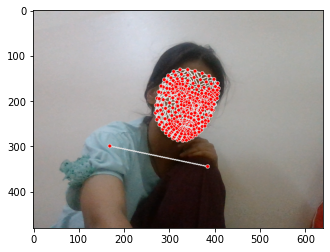

In [23]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [20]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read feed
        ret,frame = cap.read()
        #make detection
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        #Draw landmarks
        draw_styled_landmarks(image,results)
        #show to screen
        cv2.imshow("OpenCV Feed",image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [24]:
results.count

<method 'count' of 'tuple' objects>

In [25]:
results.face_landmarks

landmark {
  x: 0.5314245223999023
  y: 0.5113551616668701
  z: -0.02559148333966732
}
landmark {
  x: 0.5459474325180054
  y: 0.4671168923377991
  z: -0.04405249282717705
}
landmark {
  x: 0.5389133095741272
  y: 0.4792642295360565
  z: -0.023701883852481842
}
landmark {
  x: 0.546672523021698
  y: 0.4241372346878052
  z: -0.034037668257951736
}
landmark {
  x: 0.5495485067367554
  y: 0.4549027383327484
  z: -0.046729352325201035
}
landmark {
  x: 0.5524635910987854
  y: 0.4387415945529938
  z: -0.04308897256851196
}
landmark {
  x: 0.5580965876579285
  y: 0.3986203968524933
  z: -0.01956431195139885
}
landmark {
  x: 0.49522581696510315
  y: 0.3663051426410675
  z: -0.001049415790475905
}
landmark {
  x: 0.5654571056365967
  y: 0.36600640416145325
  z: -0.013201422058045864
}
landmark {
  x: 0.5703603625297546
  y: 0.34922870993614197
  z: -0.014320122078061104
}
landmark {
  x: 0.5837015509605408
  y: 0.29096388816833496
  z: -0.003573980648070574
}
landmark {
  x: 0.529666602611541

# Extracting key points values

In [26]:
results.face_landmarks

landmark {
  x: 0.5314245223999023
  y: 0.5113551616668701
  z: -0.02559148333966732
}
landmark {
  x: 0.5459474325180054
  y: 0.4671168923377991
  z: -0.04405249282717705
}
landmark {
  x: 0.5389133095741272
  y: 0.4792642295360565
  z: -0.023701883852481842
}
landmark {
  x: 0.546672523021698
  y: 0.4241372346878052
  z: -0.034037668257951736
}
landmark {
  x: 0.5495485067367554
  y: 0.4549027383327484
  z: -0.046729352325201035
}
landmark {
  x: 0.5524635910987854
  y: 0.4387415945529938
  z: -0.04308897256851196
}
landmark {
  x: 0.5580965876579285
  y: 0.3986203968524933
  z: -0.01956431195139885
}
landmark {
  x: 0.49522581696510315
  y: 0.3663051426410675
  z: -0.001049415790475905
}
landmark {
  x: 0.5654571056365967
  y: 0.36600640416145325
  z: -0.013201422058045864
}
landmark {
  x: 0.5703603625297546
  y: 0.34922870993614197
  z: -0.014320122078061104
}
landmark {
  x: 0.5837015509605408
  y: 0.29096388816833496
  z: -0.003573980648070574
}
landmark {
  x: 0.529666602611541

In [27]:
results.pose_landmarks

landmark {
  x: 0.5588647127151489
  y: 0.47217750549316406
  z: -0.9926515817642212
  visibility: 0.993511438369751
}
landmark {
  x: 0.5847827196121216
  y: 0.42278939485549927
  z: -0.92030268907547
  visibility: 0.9908573627471924
}
landmark {
  x: 0.5955183506011963
  y: 0.4269971251487732
  z: -0.9210020303726196
  visibility: 0.9914353489875793
}
landmark {
  x: 0.605734646320343
  y: 0.43073317408561707
  z: -0.921235203742981
  visibility: 0.9892681837081909
}
landmark {
  x: 0.5417044162750244
  y: 0.4038647711277008
  z: -0.9844201803207397
  visibility: 0.9924212694168091
}
landmark {
  x: 0.522347092628479
  y: 0.3957861363887787
  z: -0.9844478368759155
  visibility: 0.9939110279083252
}
landmark {
  x: 0.5035389065742493
  y: 0.3890727758407593
  z: -0.9852096438407898
  visibility: 0.9930989146232605
}
landmark {
  x: 0.5960423946380615
  y: 0.44449883699417114
  z: -0.45388680696487427
  visibility: 0.9908171892166138
}
landmark {
  x: 0.4579036831855774
  y: 0.3896664

In [28]:
results.face_landmarks.landmark

[x: 0.5314245223999023
y: 0.5113551616668701
z: -0.02559148333966732
, x: 0.5459474325180054
y: 0.4671168923377991
z: -0.04405249282717705
, x: 0.5389133095741272
y: 0.4792642295360565
z: -0.023701883852481842
, x: 0.546672523021698
y: 0.4241372346878052
z: -0.034037668257951736
, x: 0.5495485067367554
y: 0.4549027383327484
z: -0.046729352325201035
, x: 0.5524635910987854
y: 0.4387415945529938
z: -0.04308897256851196
, x: 0.5580965876579285
y: 0.3986203968524933
z: -0.01956431195139885
, x: 0.49522581696510315
y: 0.3663051426410675
z: -0.001049415790475905
, x: 0.5654571056365967
y: 0.36600640416145325
z: -0.013201422058045864
, x: 0.5703603625297546
y: 0.34922870993614197
z: -0.014320122078061104
, x: 0.5837015509605408
y: 0.29096388816833496
z: -0.003573980648070574
, x: 0.5296666026115417
y: 0.5176405310630798
z: -0.024608802050352097
, x: 0.527677595615387
y: 0.5221916437149048
z: -0.0217592790722847
, x: 0.5261428952217102
y: 0.5239506363868713
z: -0.018031073734164238
, x: 0.5249

In [29]:
len(results.face_landmarks.landmark)

468

In [30]:
len(results.pose_landmarks.landmark)

33

In [31]:
results.pose_landmarks.landmark[0]  # the next cell is equivalent of doing these one by one 

x: 0.5588647127151489
y: 0.47217750549316406
z: -0.9926515817642212
visibility: 0.993511438369751

In [32]:
# not needed
pose = [] # placeholder
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [ ]:
#not needed
pose  # one set of landmarks done data processing done

In [ ]:
#not needed
# save code as above but refractor in a single line
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(132)

In [ ]:
#not needed
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [ ]:
#not needed
# handling error when there is no value for that particular landmarks with blank value
rh= np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
# not needed
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(1404)

In [ ]:
#not needed
face

In [ ]:
#not needed
rh

In [ ]:
#not needed
np.zeros(21*3)

In [ ]:
# not needed
pose # after flattening in one big array

In [ ]:
#not needed
lh

In [ ]:
# def extract_keypoints(results):
#     pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
#     lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
#     rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
#     return np.concatenate([pose, face, lh, rh])


In [33]:
# above all not needed are converted into the func
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh= np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [34]:
result_test = extract_keypoints(results)

In [35]:
result_test

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
np.save("0",result_test)  # saving each frame as np array

In [37]:
np.load("0.npy")

array([0., 0., 0., ..., 0., 0., 0.])

# Setup folders for collection

In [38]:
# path for our exported data ,numpy array
DATA_PATH = os.path.join("MP_Data")

#actions that we try to detect  # using 30 different frames to be able to detect a particular gestures
#3 different actions and 30 frames and the no. of sequence
actions = np.array(["hello","thanks","iloveyou"])
no_sequences = 30 ## think as 30 video worth of data
sequence_length = 30  # each video have 30 frame in length

In [39]:
#hello
#0
#1
#thanks 
#iloveyou

In [40]:
#looping through it
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# Collecting keypoints values for training and testing

In [41]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# preprocessing data and create labels and features

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [43]:
label_map = {label:num for num,label in enumerate(actions)}

In [44]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [45]:
sequences,labels= [],[]
for action in actions:
    for sequence in range(no_sequences):
        window =[]
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [46]:
sequences

[[array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([ 0.        ,  0.        ,  0.        , ...,  0.16093767,
          0.68808258, -0.11703144]),
  array([ 0.50686944,  0.38364914, -0.77870452, ...,  0.17912708,
          0.88073015, -0.09877135]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([ 0.48456758,  0.37812567, -0.60708916, ...,  0.        ,
          0.        ,  0.        ]),
  array([0.

In [47]:
np.array(sequences).shape

(90, 30, 1662)

In [48]:
np.array(labels).shape

(90,)

In [49]:
x = np.array(sequences)

In [50]:
x

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.51128703,  0.37512615, -0.60874879, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.49041429,  0.37539232, -0.62158906, ...,  0.28853455,
          0.04061709, -0.07747385],
        [ 0.        ,  0.        ,  0.        , ...,  0.32101578,
          0.03576609, -0.01382346]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.31951368,
          0.04780681, -0.01600801],
        [ 0.        ,  0.        ,  0.        , ...,  0.30894226,
          0.10764138, -0.00135795],
        [ 0.        ,  0.        ,  0.        , ...,  0.31689569,
          0.10758374,  0.00858137],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [51]:
y = to_categorical(labels).astype(int)

In [52]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)

In [54]:
x_train.shape

(85, 30, 1662)

In [55]:
x_test.shape


(5, 30, 1662)

# buildand train lstm neural network

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [57]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [58]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [59]:
x.shape

(90, 30, 1662)

In [60]:
actions.shape[0]

3

In [61]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [62]:
model

In [63]:
model.fit(x_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 110ms/step - loss: 1.1499 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.0871 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.1254 - categorical_accuracy: 0.3647
Epoch 4/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.3287 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0631 - categorical_accuracy: 0.5765
Epoch 6/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0305 - categorical_accuracy: 0.5059
Epoch 7/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.9109 - categorical_accuracy: 0.5176
Epoch 8/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.1478 - categorical_accuracy: 0.4353
Epoch 9/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.9054 - categorical_accuracy:

3/3 [==============================] - 0s 95ms/step - loss: 0.8027 - categorical_accuracy: 0.5765
Epoch 75/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.7344 - categorical_accuracy: 0.6353
Epoch 76/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.6721 - categorical_accuracy: 0.6471
Epoch 77/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.6371 - categorical_accuracy: 0.6941
Epoch 78/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.5632 - categorical_accuracy: 0.7765
Epoch 79/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.5904 - categorical_accuracy: 0.7529
Epoch 80/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.4879 - categorical_accuracy: 0.7529
Epoch 81/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5105 - categorical_accuracy: 0.8353
Epoch 82/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.5392 - categorical_accuracy: 0.8588
Epoc

3/3 [==============================] - 0s 100ms/step - loss: 1.0969 - categorical_accuracy: 0.3529
Epoch 219/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0969 - categorical_accuracy: 0.3529
Epoch 220/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0970 - categorical_accuracy: 0.3529
Epoch 221/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0969 - categorical_accuracy: 0.3529
Epoch 222/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 223/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 224/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 225/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 226/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0970 - categorical_accuracy: 0.35

3/3 [==============================] - 0s 97ms/step - loss: 1.0065 - categorical_accuracy: 0.4941
Epoch 363/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.9717 - categorical_accuracy: 0.5059
Epoch 364/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.8837 - categorical_accuracy: 0.5529
Epoch 365/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.8382 - categorical_accuracy: 0.6118
Epoch 366/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8224 - categorical_accuracy: 0.6235
Epoch 367/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0334 - categorical_accuracy: 0.4235
Epoch 368/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.2661 - categorical_accuracy: 0.3412
Epoch 369/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1358 - categorical_accuracy: 0.3294
Epoch 370/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1149 - categorical_accuracy: 0.

3/3 [==============================] - 0s 96ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 507/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0973 - categorical_accuracy: 0.4000
Epoch 508/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0970 - categorical_accuracy: 0.3529
Epoch 509/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0965 - categorical_accuracy: 0.3529
Epoch 510/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0969 - categorical_accuracy: 0.3529
Epoch 511/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0974 - categorical_accuracy: 0.3529
Epoch 512/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0981 - categorical_accuracy: 0.3529
Epoch 513/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0974 - categorical_accuracy: 0.3529
Epoch 514/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0976 - categorical_accuracy: 0

3/3 [==============================] - 0s 98ms/step - loss: 1.0956 - categorical_accuracy: 0.3529
Epoch 651/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0952 - categorical_accuracy: 0.3529
Epoch 652/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0951 - categorical_accuracy: 0.3647
Epoch 653/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0957 - categorical_accuracy: 0.3294
Epoch 654/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0953 - categorical_accuracy: 0.3765
Epoch 655/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0957 - categorical_accuracy: 0.3765
Epoch 656/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0957 - categorical_accuracy: 0.3765
Epoch 657/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0958 - categorical_accuracy: 0.3765
Epoch 658/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0956 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 101ms/step - loss: 1.0930 - categorical_accuracy: 0.3529
Epoch 795/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0922 - categorical_accuracy: 0.3529
Epoch 796/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0924 - categorical_accuracy: 0.3529
Epoch 797/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0918 - categorical_accuracy: 0.2941
Epoch 798/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0921 - categorical_accuracy: 0.3176
Epoch 799/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0933 - categorical_accuracy: 0.3765
Epoch 800/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0926 - categorical_accuracy: 0.3765
Epoch 801/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0918 - categorical_accuracy: 0.3647
Epoch 802/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0914 - categorical_accurac

3/3 [==============================] - 0s 101ms/step - loss: 1.0838 - categorical_accuracy: 0.3765
Epoch 939/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0853 - categorical_accuracy: 0.3176
Epoch 940/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0840 - categorical_accuracy: 0.2941
Epoch 941/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0824 - categorical_accuracy: 0.3765
Epoch 942/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0871 - categorical_accuracy: 0.3765
Epoch 943/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0803 - categorical_accuracy: 0.4235
Epoch 944/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0832 - categorical_accuracy: 0.3529
Epoch 945/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0860 - categorical_accuracy: 0.3529
Epoch 946/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0814 - categorical_accurac

3/3 [==============================] - 0s 105ms/step - loss: 1.0704 - categorical_accuracy: 0.3059
Epoch 1011/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0638 - categorical_accuracy: 0.3765
Epoch 1012/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0645 - categorical_accuracy: 0.3882
Epoch 1013/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0608 - categorical_accuracy: 0.3882
Epoch 1014/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0589 - categorical_accuracy: 0.3882
Epoch 1015/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0589 - categorical_accuracy: 0.3294
Epoch 1016/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0614 - categorical_accuracy: 0.3529
Epoch 1017/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0633 - categorical_accuracy: 0.3882
Epoch 1018/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0628 - categorical_acc

3/3 [==============================] - 0s 101ms/step - loss: 1.0457 - categorical_accuracy: 0.3882
Epoch 1153/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0486 - categorical_accuracy: 0.3882
Epoch 1154/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0464 - categorical_accuracy: 0.3882
Epoch 1155/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.0492 - categorical_accuracy: 0.3176
Epoch 1156/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0479 - categorical_accuracy: 0.3882
Epoch 1157/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0467 - categorical_accuracy: 0.3882
Epoch 1158/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0473 - categorical_accuracy: 0.3882
Epoch 1159/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0494 - categorical_accuracy: 0.4000
Epoch 1160/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0467 - categorical_

3/3 [==============================] - 0s 96ms/step - loss: 1.0392 - categorical_accuracy: 0.4118
Epoch 1295/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0410 - categorical_accuracy: 0.3882
Epoch 1296/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0399 - categorical_accuracy: 0.3882
Epoch 1297/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0412 - categorical_accuracy: 0.3294
Epoch 1298/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0424 - categorical_accuracy: 0.4000
Epoch 1299/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0505 - categorical_accuracy: 0.3059
Epoch 1300/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0442 - categorical_accuracy: 0.4000
Epoch 1301/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0442 - categorical_accuracy: 0.4118
Epoch 1302/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0419 - categorical_accurac

KeyboardInterrupt: 

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# Make predictions

In [65]:
res=model.predict(x_test)

1/1 [==============================] - 1s 609ms/step


In [66]:
len(res)

5

In [67]:
np.sum(res[0])

0.99999994

In [76]:
actions[np.argmax(res[1])]

'thanks'

In [69]:
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [73]:
actions[np.argmax(y_test[1])]

'iloveyou'

In [74]:
model.save('action.hs')

INFO:tensorflow:Assets written to: action.hs\assets


In [77]:
model.load_weights('action.hs')

In [78]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [79]:
yhat = model.predict(x_train)

3/3 [==============================] - 0s 51ms/step


In [80]:
ytrue = np.argmax(y_train,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [81]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[56,  0],
        [29,  0]],

       [[ 0, 55],
        [ 0, 30]],

       [[59,  0],
        [26,  0]]], dtype=int64)

In [82]:
accuracy_score(ytrue,yhat)

0.35294117647058826

# Test in real time

In [83]:

from scipy import stats

In [84]:
actions

array(['hello', 'thanks', 'iloveyou'], dtype='<U8')

In [85]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        print(num)
    return output_frame

In [86]:
res

array([[0.32333776, 0.36257464, 0.31408757],
       [0.32333776, 0.36257464, 0.31408757],
       [0.32333776, 0.36257464, 0.31408757],
       [0.32333776, 0.36257464, 0.31408757],
       [0.32333776, 0.36257464, 0.31408757]], dtype=float32)

In [87]:
colors

[(245, 117, 16), (117, 245, 16), (16, 117, 245)]

In [88]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [89]:
#just simple detection no voice
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 26ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===================

1/1 [==============================] - 0s 28ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===================

In [ ]:
#english
from gtts import gTTS
import os
import time

# Function for converting text to speech
def text_to_speech(text):
    tts = gTTS(text=text, lang='en')
    tts.save("output.mp3")
    os.system("start output.mp3")  # Play the generated audio file
    time.sleep(1)  # Add a pause of 1 second after playing the audio

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
consistent_frames = 5  # Number of consecutive frames the gesture should be recognized for

# Set up video capture
cap = cv2.VideoCapture(0)

# Set up MediaPipe holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame from video feed
        ret, frame = cap.read()
        if not ret:
            break
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            # Check for consistency in predictions
            if len(predictions) >= consistent_frames:
                if len(set(predictions[-consistent_frames:])) == 1:
                    # Gesture detected consistently for 'consistent_frames' frames
                    if np.max(res) > threshold:
                        detected_action = actions[np.argmax(res)]
                        if detected_action not in sentence:
                            sentence.append(detected_action)
                            # Convert detected sign to speech
                            message = ' '.join(sentence)
                            text_to_speech(message)
        
            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        # Display text on the screen
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    # Release the video capture and close all windows
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
#hindii
from gtts import gTTS
import os
import time
from googletrans import Translator

# Function for converting text to speech
def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang)
    tts.save("output.mp3")
    os.system("start output.mp3")  # Play the generated audio file
    time.sleep(1)  # Add a pause of 1 second after playing the audio

# Function for translating text
def translate_text(text, target_lang='en'):
    translator = Translator()
    translation = translator.translate(text, dest=target_lang)
    return translation.text

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
consistent_frames = 5  # Number of consecutive frames the gesture should be recognized for

# Set up video capture
cap = cv2.VideoCapture(0)

# Set up MediaPipe holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame from video feed
        ret, frame = cap.read()
        if not ret:
            break
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            # Check for consistency in predictions
            if len(predictions) >= consistent_frames:
                if len(set(predictions[-consistent_frames:])) == 1:
                    # Gesture detected consistently for 'consistent_frames' frames
                    if np.max(res) > threshold:
                        detected_action = actions[np.argmax(res)]
                        if detected_action not in sentence:
                            sentence.append(detected_action)
                            # Translate the detected action to Hindi
                            translated_text = translate_text(detected_action, target_lang='hi')
                            # Convert translated text to speech
                            text_to_speech(translated_text, lang='hi')
        
            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        # Display text on the screen
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    # Release the video capture and close all windows
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
#working okk okk 
from gtts import gTTS
import os
import time
import cv2
import numpy as np
import mediapipe as mp
from googletrans import Translator

# Function for converting text to speech
def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang)
    tts.save("output.mp3")
    os.system("start output.mp3")  # Play the generated audio file
    time.sleep(1)  # Add a pause of 1 second after playing the audio

# Function for translating text
def translate_text(text, target_lang='en'):
    translator = Translator()
    translation = translator.translate(text, dest=target_lang)
    return translation.text

# Set up video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to open video capture.")
    exit()

# Set up MediaPipe holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
consistent_frames = 5  # Number of consecutive frames the gesture should be recognized for

# Function to detect and process gestures
def detect_and_process_gestures():
    global sequence, sentence, predictions

    # Make detections
    image, results = mediapipe_detection(frame, holistic)
    
    # Draw landmarks
    draw_styled_landmarks(image, results)
    
    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))
        
        # Check for consistency in predictions
        if len(predictions) >= consistent_frames:
            if len(set(predictions[-consistent_frames:])) == 1:
                # Gesture detected consistently for 'consistent_frames' frames
                if np.max(res) > threshold:
                    detected_action = actions[np.argmax(res)]
                    if detected_action not in sentence:
                        sentence.append(detected_action)
                        # Convert detected sign to speech
                        message = ' '.join(sentence)
                        # Ask user for language preference
                        lang_preference = input("Enter 'en' for English or 'hi' for Hindi (default: en): ")
                        if lang_preference.lower() == 'hi':
                            # Translate the detected action to Hindi
                            translated_text = translate_text(message, target_lang='hi')
                            # Convert translated text to speech in Hindi
                            text_to_speech(translated_text, lang='hi')
                        else:
                            # Convert detected sign to speech in English
                            text_to_speech(message)
    
        if len(sentence) > 5: 
            sentence = sentence[-5:]
        
        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
    
    # Display text on the screen
    cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3,30), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow('OpenCV Feed', image)

# Main loop for video capture and gesture detection
while cap.isOpened():
    # Read frame from video feed
    ret, frame = cap.read()
    if not ret:
        print("Error: Unable to read frame from video feed.")
        break

    # Detect and process gestures
    detect_and_process_gestures()

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
#include kannada also just simple no gui
from gtts import gTTS
import os
import time
import cv2
import numpy as np
import mediapipe as mp
from googletrans import Translator

# Function for converting text to speech
def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang)
    tts.save("output.mp3")
    os.system("start output.mp3")  # Play the generated audio file
    time.sleep(1)  # Add a pause of 1 second after playing the audio

# Function for translating text
def translate_text(text, target_lang='en'):
    translator = Translator()
    translation = translator.translate(text, dest=target_lang)
    return translation.text

# Set up video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to open video capture.")
    exit()

# Set up MediaPipe holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
consistent_frames = 5  # Number of consecutive frames the gesture should be recognized for

# Function to detect and process gestures
def detect_and_process_gestures():
    global sequence, sentence, predictions

    # Make detections
    image, results = mediapipe_detection(frame, holistic)
    
    # Draw landmarks
    draw_styled_landmarks(image, results)
    
    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))
        
        # Check for consistency in predictions
        if len(predictions) >= consistent_frames:
            if len(set(predictions[-consistent_frames:])) == 1:
                # Gesture detected consistently for 'consistent_frames' frames
                if np.max(res) > threshold:
                    detected_action = actions[np.argmax(res)]
                    if detected_action not in sentence:
                        sentence.append(detected_action)
                        # Convert detected sign to speech
                        message = ' '.join(sentence)
                        # Ask user for language preference
                        lang_preference = input("Enter 'en' for English, 'hi' for Hindi, or 'kn' for Kannada (default: en): ")
                        if lang_preference.lower() == 'hi':
                            # Translate the detected action to Hindi
                            translated_text = translate_text(message, target_lang='hi')
                            # Convert translated text to speech in Hindi
                            text_to_speech(translated_text, lang='hi')
                        elif lang_preference.lower() == 'kn':
                            # Translate the detected action to Kannada
                            translated_text = translate_text(message, target_lang='kn')
                            # Convert translated text to speech in Kannada
                            text_to_speech(translated_text, lang='kn')
                        else:
                            # Convert detected sign to speech in English
                            text_to_speech(message)
    
        if len(sentence) > 5: 
            sentence = sentence[-5:]
        
        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
    
    # Display text on the screen
    cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3,30), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow('OpenCV Feed', image)

# Main loop for video capture and gesture detection
while cap.isOpened():
    # Read frame from video feed
    ret, frame = cap.read()
    if not ret:
        print("Error: Unable to read frame from video feed.")
        break

    # Detect and process gestures
    detect_and_process_gestures()

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
# gui i will see if these would work or not
import tkinter as tk
from gtts import gTTS
import os
import cv2
import numpy as np
import mediapipe as mp
from googletrans import Translator
import time

# Function for converting text to speech
def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang)
    tts.save("output.mp3")
    os.system("start output.mp3")  # Play the generated audio file
    time.sleep(1)  # Add a pause of 1 second after playing the audio

# Function for translating text
def translate_text(text, target_lang='en'):
    translator = Translator()
    translation = translator.translate(text, dest=target_lang)
    return translation.text

# Function to clear the sentence
def clear_sentence():
    global sentence
    sentence = []
    label.config(text='')

# Function to convert detected gesture to speech
def convert_to_speech():
    global sentence
    if sentence:
        message = ' '.join(sentence)
        lang_preference = language.get()
        if lang_preference == 'Hindi':
            translated_text = translate_text(message, target_lang='hi')
            text_to_speech(translated_text, lang='hi')
        else:
            text_to_speech(message)

# Set up video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to open video capture.")
    exit()

# Set up MediaPipe holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
consistent_frames = 5  # Number of consecutive frames the gesture should be recognized for

# Function to detect and process gestures
def detect_and_process_gestures():
    global sequence, sentence, predictions

    # Make detections
    _, frame = cap.read()
    image, results = mediapipe_detection(frame, holistic)
    
    # Draw landmarks
    draw_styled_landmarks(image, results)
    
    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))
        
        # Check for consistency in predictions
        if len(predictions) >= consistent_frames:
            if len(set(predictions[-consistent_frames:])) == 1:
                # Gesture detected consistently for 'consistent_frames' frames
                if np.max(res) > threshold:
                    detected_action = actions[np.argmax(res)]
                    if detected_action not in sentence:
                        # Clear previous sentences if a new gesture is detected
                        sentence = []
                    sentence.append(detected_action)
                    # Update label text
                    label.config(text=' '.join(sentence))
    
        if len(sentence) > 5: 
            sentence = sentence[-5:]
        
        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
    
    # Display the frame
    cv2image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    panel.imgtk = imgtk
    panel.config(image=imgtk)
    panel.after(10, detect_and_process_gestures)

# Create GUI
root = tk.Tk()
root.title("Gesture to Speech")

# Create a frame for buttons
button_frame = tk.Frame(root)
button_frame.pack(pady=20)

# Button for speech conversion
speech_button = tk.Button(button_frame, text="Convert to Speech", command=convert_to_speech)
speech_button.grid(row=0, column=0, padx=10)

# Button for language selection
language_label = tk.Label(button_frame, text="Select Language:")
language_label.grid(row=0, column=1, padx=10)

language = tk.StringVar(value="English")
language_menu = tk.OptionMenu(button_frame, language, "English", "Hindi")
language_menu.grid(row=0, column=2, padx=10)

# Button for clearing the sentence
clear_button = tk.Button(button_frame, text="Clear Sentence", command=clear_sentence)
clear_button.grid(row=0, column=3, padx=10)

# Create a label to display the detected gestures
label = tk.Label(root, text="", font=("Arial", 14))
label.pack(pady=20)

# Create a panel to display the video feed
panel = tk.Label(root)
panel.pack(padx=10, pady=10)

# Start gesture detection and processing
detect_and_process_gestures()

# Run the Tkinter event loop
root.mainloop()


In [ ]:
# working perfectly fine
import tkinter as tk
from gtts import gTTS
import os
import cv2
import numpy as np
import mediapipe as mp
from googletrans import Translator
import time

# Function for converting text to speech
def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang)
    tts.save("output.mp3")
    os.system("start output.mp3")  # Play the generated audio file
    time.sleep(1)  # Add a pause of 1 second after playing the audio

# Function for translating text
def translate_text(text, target_lang='en'):
    translator = Translator()
    translation = translator.translate(text, dest=target_lang)
    return translation.text

# Function to clear the sentence
def clear_sentence():
    global sentence
    sentence = []
    label.config(text='')

# Function to convert detected gesture to speech
def convert_to_speech():
    global sentence
    if sentence:
        message = ' '.join(sentence)
        lang_preference = language.get()
        if lang_preference == 'Hindi':
            translated_text = translate_text(message, target_lang='hi')
            text_to_speech(translated_text, lang='hi')
        elif lang_preference == 'Kannada':
            translated_text = translate_text(message, target_lang='kn')
            text_to_speech(translated_text, lang='kn')
        else:
            text_to_speech(message)

# Set up video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to open video capture.")
    exit()

# Set up MediaPipe holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
consistent_frames = 5  # Number of consecutive frames the gesture should be recognized for

# New variable to track the last displayed gesture
last_displayed_gesture = None

# Function to detect and process gestures
def detect_and_process_gestures():
    global sequence, sentence, predictions, last_displayed_gesture

    # Make detections
    _, frame = cap.read()
    image, results = mediapipe_detection(frame, holistic)
    
    # Draw landmarks
    draw_styled_landmarks(image, results)
    
    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))
        
        # Check for consistency in predictions
        if len(predictions) >= consistent_frames:
            if len(set(predictions[-consistent_frames:])) == 1:
                # Gesture detected consistently for 'consistent_frames' frames
                if np.max(res) > threshold:
                    detected_action = actions[np.argmax(res)]
                    if detected_action != last_displayed_gesture:
                        # Display only if the detected gesture is different from the last displayed gesture
                        if detected_action not in sentence:
                            # Clear previous sentences if a new gesture is detected
                            sentence = []
                        sentence.append(detected_action)
                        # Update label text
                        label.config(text=' '.join(sentence))
                        # Update the last displayed gesture
                        last_displayed_gesture = detected_action
    
        if len(sentence) > 5: 
            sentence = sentence[-5:]
        
        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
    
    # Display the frame
    cv2image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    panel.imgtk = imgtk
    panel.config(image=imgtk)
    panel.after(10, detect_and_process_gestures)

# Create GUI
root = tk.Tk()
root.title("Gesture to Speech")

# Create a frame for buttons
button_frame = tk.Frame(root)
button_frame.pack(pady=20)

# Button for speech conversion
speech_button = tk.Button(button_frame, text="Convert to Speech", command=convert_to_speech)
speech_button.grid(row=0, column=0, padx=10)

# Button for language selection
language_label = tk.Label(button_frame, text="Select Language:")
language_label.grid(row=0, column=1, padx=10)

language = tk.StringVar(value="English")
language_menu = tk.OptionMenu(button_frame, language, "English", "Hindi","Kannada")
language_menu.grid(row=0, column=2, padx=10)

# Button for clearing the sentence
clear_button = tk.Button(button_frame, text="Clear Sentence", command=clear_sentence)
clear_button.grid(row=0, column=3, padx=10)

# Create a label to display the detected gestures
label = tk.Label(root, text="", font=("Arial", 14))
label.pack(pady=20)

# Create a panel to display the video feed
panel = tk.Label(root)
panel.pack(padx=10, pady=10)

# Start gesture detection and processing
detect_and_process_gestures()

# Run the Tkinter event loop
root.mainloop()
